# Tarea 2


MA5203 - Aprendizaje de Máquinas Probabilístico

Profesor: Felipe Tobar

Autor: Martín Cornejo

## Paquetes necesarios

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pdb

# P1 Regresión No Lineal

In [12]:
data = np.genfromtxt('datosT2.txt', delimiter=' ')
x = data[:,0]
y = data[:,1]

# dividimos train y test en 75 y 25% respectivamente
x_tr = x[0:108];
y_tr = y[0:108];

x_te = x[108:144];
y_te = y[108:144];

### A continuación se grafica la data:

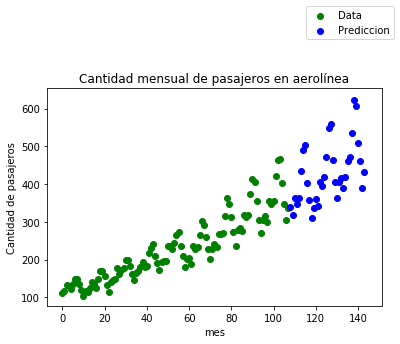

In [16]:
#mpl.rcParams['figure.figsize'] = (3,3)
plt.figure()
plt.scatter(x_tr,y_tr, c ='g')
plt.scatter(x_te,y_te, c ='b')
plt.title("Cantidad mensual de pasajeros en aerolínea")
plt.xlabel("mes")
plt.ylabel("Cantidad de pasajeros")
plt.legend(["Train","Test"], bbox_to_anchor=(1.05, 1.40))

### Regresión lineal regularizada

Sabemos que para la regresión lineal regularizada, el parámetro $\theta$ tiene la forma:
\begin{equation}
\theta = (\tilde{X}^{T}\tilde{X} + \rho I)^{-1} \tilde{X}^{T}Y
\end{equation}

Dado que este es el caso en que $x \rightarrow f(x) \ \epsilon \ \rm I\!R \rightarrow \rm I\!R$, tenemos que $\tilde{X}$ tiene la forma

\begin{equation}
\tilde{X} = \begin{bmatrix}
           x_{1} & 1\\
           x_{2} & 1\\
           \vdots & \vdots \\
           x_{N} & 1
         \end{bmatrix}
, \ Y = \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{N} 
         \end{bmatrix}
\end{equation}

Por lo que la identidad pertenecerá a $\rm I\!R^{2x2}$ y $\theta$ a $\rm I\!R^{2}$, lo cual tiene sentido ya que $\theta$ tiene la forma de un vector de dos componentes, cuyos valores corresponderán a la pendiente $m$ y el coeficiente de posición $b$ de una recta. 

In [4]:
x_tilda = np.array([x, np.ones(len(x))]).transpose()
y_reg = y
rho = 0
identidad = np.identity(2)

def get_theta(rho):
    mul1 = np.linalg.inv(
        np.add(
            np.matmul(x_tilda.transpose(), x_tilda), 
            np.dot(identidad, rho)))
    mul2 = np.matmul(x_tilda.transpose(), y_reg)
    return np.matmul(mul1, mul2)

Luego de obtener $\theta$ en función de $\rho$, procedemos a graficar predicciones para 10 puntos con distintos valores de $\rho$:

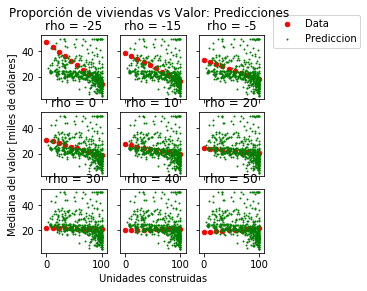

In [8]:
def recta(x, rho): 
    theta = get_theta(rho)
    return x * theta[0] + theta[1]

mpl.rcParams['figure.figsize'] = (4,4)
x_recta = np.linspace(0, 100, 10)
scatter_size = 20
f, figures = plt.subplots(3, 3, sharex='col', sharey='row')
plt.suptitle("Proporción de viviendas vs Valor: Predicciones")
rho = np.array([[-25, -15, -5], [0, 10, 20], [30, 40, 50]])
for idx, figure_arr in enumerate(figures):
    for idy, figure in enumerate(figure_arr):
        figure.set_title("rho = " + str(rho[idx][idy]))
        figure.scatter(
            x_recta,
            recta(x_recta, rho[idx][idy]), 
            s=scatter_size, c='r')
        figure.scatter(x,y, s=1, c='g')   
            
        if idy == 1 and idx == 2:
            figure.set_xlabel("Unidades construidas")
        
        if idy == 0 and idx == 1:
            figure.set_ylabel("Mediana del valor [miles de dólares]")
            
        if idy == len(rho[0]) - 1 and idx == 0:
            figure.legend(["Data","Prediccion"], bbox_to_anchor=(1.05, 1.40))

### Comparando con polyfit

Es claro observar que el resultado de __polyfit__ es equivalente a usar nuestro resultado usando $\rho = 0$, es más notamos que los parámetros de ambas rectas son casi idénticos:

In [6]:
print("Theta polyfit: ", np.polyfit(x,y, 1))
print("Theta formula: ", get_theta(0))

Theta polyfit:  [-0.12316272 30.97867776]
Theta formula:  [-0.12316272 30.97867776]
